In [1]:
import os
import numpy as np
import seaborn as sns # for plots
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy import stats as sps # to calcualte confidence intervals, etc
from adjustText import adjust_text # to adjust the text labels in the plots (pip install adjustText)
from scipy.stats import ttest_rel, f_oneway,ttest_1samp
from dataset import *
import selective_recruitment.roi_pairs as rp
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import selective_recruitment.recruite_ana as ra

from statsmodels.stats.anova import AnovaRM # perform F test

In [2]:
summary_1 , summary_2 = rp.get_summary_pair(dataset='IBC', 
                                    ses_id='ses-rsvplanguage',type='CondHalf', roi_1='speech-half1', roi_2= 'non_speech-half1')

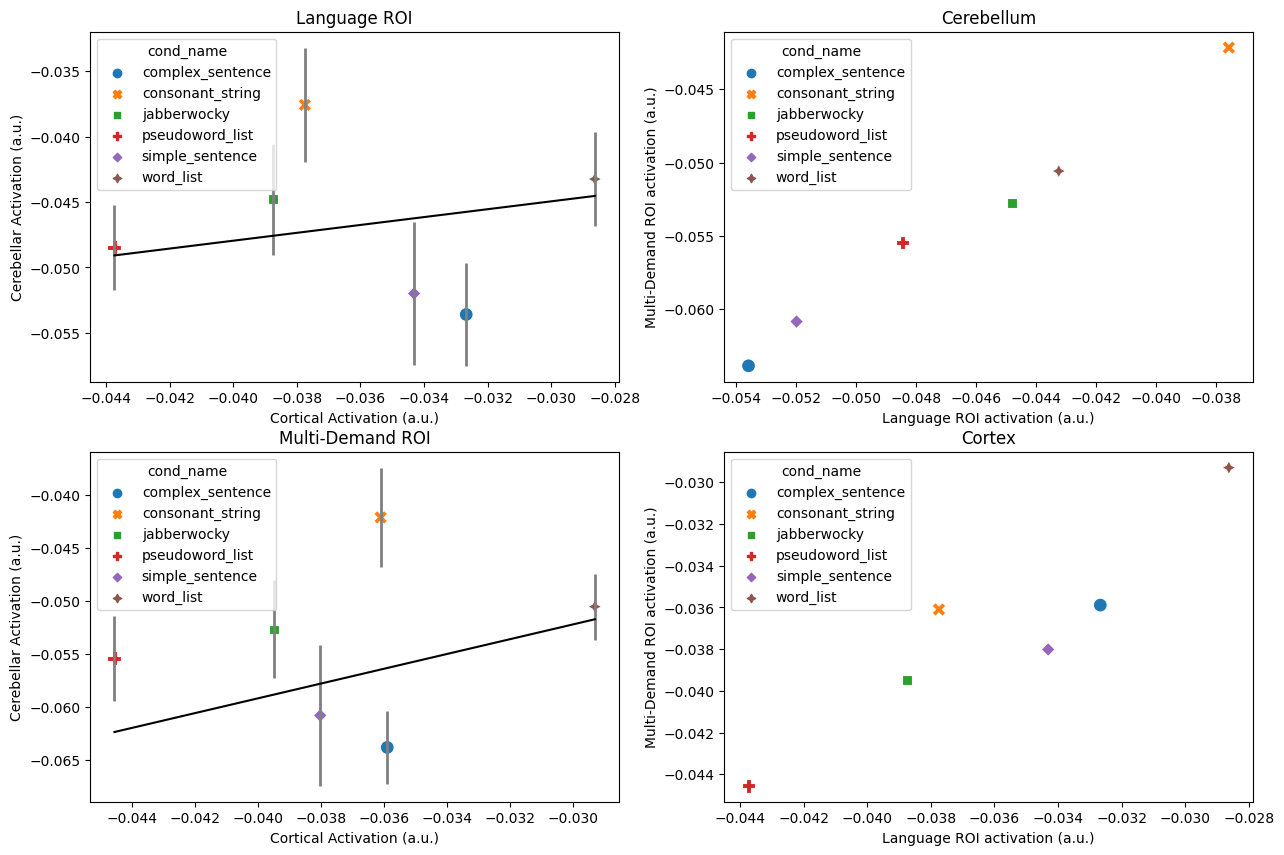

In [3]:
rp.plot_pair(dataframe_1=summary_1,dataframe_2=summary_2, markers= True)


In [4]:
display(summary_1)

,sn,cond_name,half,cond_num_uni,n_rep,Unnamed: 0,reg_id,roi,X,Y,slope,intercept,R2,res
0,0.0,complex_sentence,1.5,190.0,1.0,31.5,1.0,0.0,-0.087363,-0.065814,-0.086803,-0.070495,0.010946,-0.002902
1,0.0,consonant_string,1.5,191.0,1.0,32.5,2.0,0.0,-0.102366,-0.047657,-0.086803,-0.070495,0.010946,0.013953
2,0.0,jabberwocky,1.5,192.0,1.0,33.5,3.0,0.0,-0.113809,-0.070451,-0.086803,-0.070495,0.010946,-0.009835
3,0.0,pseudoword_list,1.5,194.0,1.0,35.5,5.0,0.0,-0.101232,-0.057286,-0.086803,-0.070495,0.010946,0.004422
4,0.0,simple_sentence,1.5,195.0,1.0,36.5,6.0,0.0,-0.087216,-0.073331,-0.086803,-0.070495,0.010946,-0.010407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,11.0,consonant_string,1.5,191.0,1.0,32.5,2.0,0.0,-0.015135,-0.031246,-0.267307,-0.041675,0.062556,0.006383
68,11.0,jabberwocky,1.5,192.0,1.0,33.5,3.0,0.0,-0.013214,-0.037220,-0.267307,-0.041675,0.062556,0.000923
69,11.0,pseudoword_list,1.5,194.0,1.0,35.5,5.0,0.0,-0.004418,-0.033798,-0.267307,-0.041675,0.062556,0.006695
70,11.0,simple_sentence,1.5,195.0,1.0,36.5,6.0,0.0,-0.012507,-0.050074,-0.267307,-0.041675,0.062556,-0.011743


In [5]:
df1,df2= rp.sim_summary_pair()


In [6]:
df1_r = ra.run_regress(df1, fit_intercept= True)
df2_r = ra.run_regress(df2, fit_intercept= True)
display(df2_r)



,sn,cond_name,X,Y,roi,slope,intercept,R2,res
0,0,word_list,-0.081898,-0.059319,0.0,0.048821,-0.052211,0.040783,-0.003109
1,0,psuedoword_list,-0.089716,-0.045156,0.0,0.048821,-0.052211,0.040783,0.011435
2,0,simple_sentence,-0.113015,-0.048082,0.0,0.048821,-0.052211,0.040783,0.009647
3,0,complex_sentence,0.026849,-0.067870,0.0,0.048821,-0.052211,0.040783,-0.016970
4,0,consonant_string,-0.085281,-0.075399,0.0,0.048821,-0.052211,0.040783,-0.019025
...,...,...,...,...,...,...,...,...,...
73,12,psuedoword_list,0.003856,-0.097199,0.0,-0.165749,-0.065569,0.032997,-0.030991
74,12,simple_sentence,-0.081041,-0.088575,0.0,-0.165749,-0.065569,0.032997,-0.036438
75,12,complex_sentence,-0.021179,0.003618,0.0,-0.165749,-0.065569,0.032997,0.065677
76,12,consonant_string,0.020562,-0.043727,0.0,-0.165749,-0.065569,0.032997,0.025250


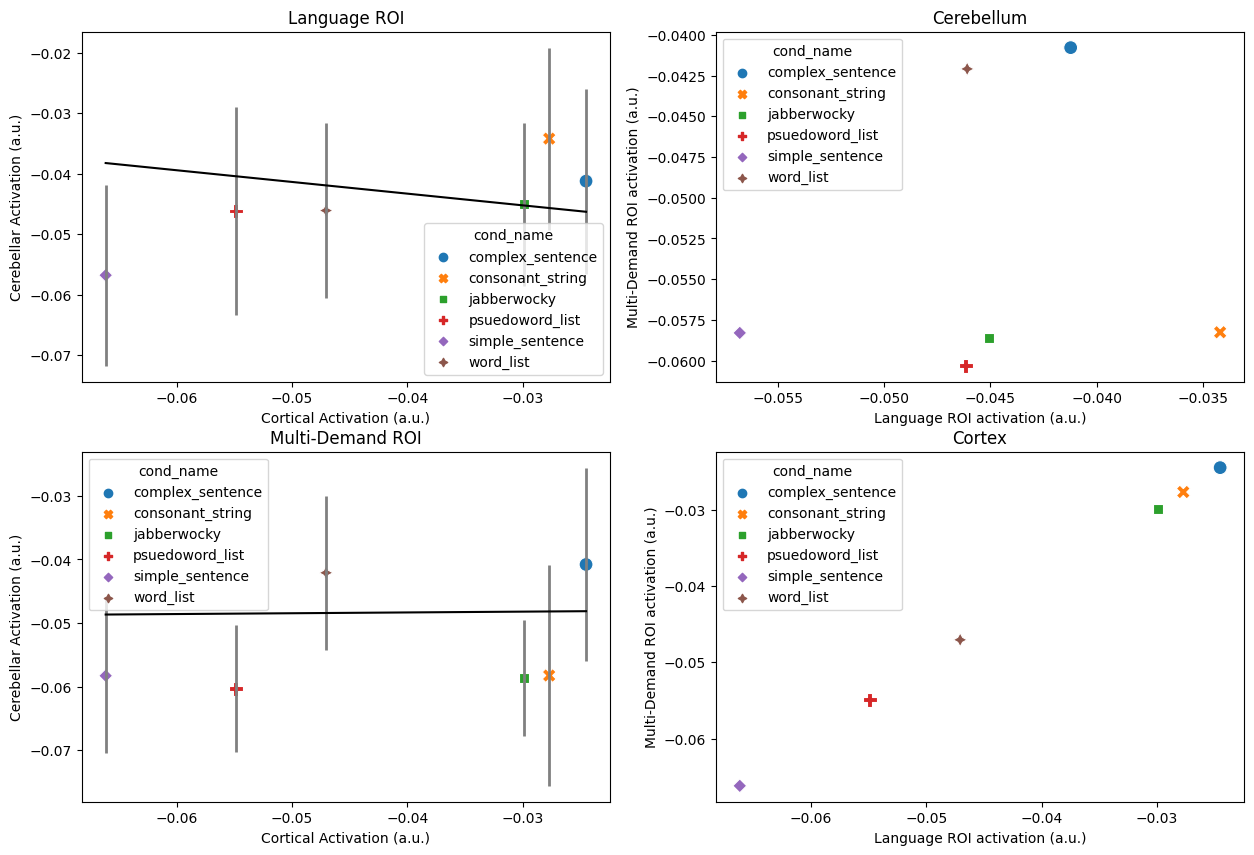

In [7]:
rp.plot_pair(df1_r, df2_r, markers= True)